In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [5]:
trainData = pd.read_csv(r'C:\Users\96278\Desktop\train.csv')
# trainData = trainData.drop(columns='Unnamed: 0')


testData = pd.read_csv(r'C:\Users\96278\Desktop\test.csv')
# testData = testData.drop(columns='Unnamed: 0')

In [6]:
trainData

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.1195,0.7346,0.0790,0.3680,...,(,),S,S,C,A,.,),I,S
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1033,0.1630,0.0799,0.0878,...,(,.,S,H,C,C,.,.,B,H
2,id_f3037fedf,id_f3037fedf_34,G,(,S,0.1120,0.1375,0.0000,0.0744,0.1835,...,(,(,S,S,A,G,(,(,S,S
3,id_468300749,id_468300749_12,G,(,S,0.0622,0.0471,0.1179,0.1075,0.0657,...,.,(,E,S,A,U,.,(,E,S
4,id_69e3878a2,id_69e3878a2_28,U,(,S,0.1378,0.1352,0.4069,0.2168,0.3375,...,(,(,S,S,G,G,(,.,S,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130555,id_796128149,id_796128149_27,U,),S,0.1244,0.0393,0.2672,0.0728,0.1479,...,),),S,S,A,A,.,.,H,M
130556,id_8a466e770,id_8a466e770_39,A,.,X,0.0201,0.0351,0.1271,0.0583,0.0580,...,.,.,H,X,A,U,.,.,H,X
130557,id_998669e76,id_998669e76_52,A,.,H,0.4597,0.0601,0.2014,0.0515,0.2838,...,.,.,H,I,U,U,.,),H,S
130558,id_6fe4a1abc,id_6fe4a1abc_45,G,.,I,0.3634,0.1063,0.1928,0.0738,0.1885,...,),.,S,I,G,G,),),S,S


<Axes: xlabel='deg_pH10'>

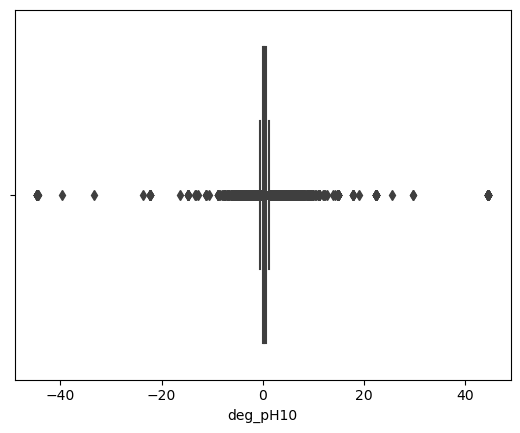

In [7]:
sns.boxplot(data = trainData, x = 'deg_pH10')

<Axes: xlabel='deg_pH10'>

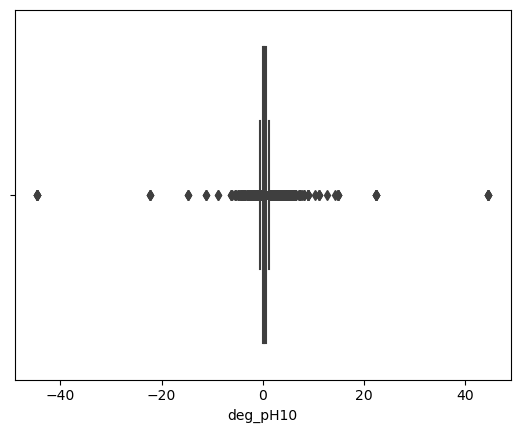

In [8]:
sns.boxplot(data = testData, x = 'deg_pH10')

'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10', 'deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C', 'deg_50C' and 'deg_error_50C' are columns that represent propabilities and thier values must be within [0,1]; they have so many unlogical values (outside [0,1]) but we cannot handle them becuase they exist in both test and train data.

In [9]:
def encoding(data):
    encode1={'A':0,'G':1 ,'U':2,'C':3 ,'-1':4}
    encode2={'.':0 , '(': 1 , ')':2,'-1':3}
    encode3={'B':0 , 'E': 1 , 'H':2,'I':3,'M':4,'S':5,'X':6,'-1':7}
    
    encodings = [encode1, encode2, encode3]
    
    for col in data.select_dtypes(include=['object']).columns:
        for encoding_dict in encodings:
            data[col] = data[col].apply(lambda x: encoding_dict.get(x, x))
    
    return data

In [10]:
train_encod=encoding(trainData)
test_encod=encoding(testData)

In [11]:
train_encod

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
0,id_159f0ff46,id_159f0ff46_44,0,0,2,1.7786,0.1195,0.7346,0.0790,0.3680,...,1,2,5,5,3,0,0,2,3,5
1,id_d73546f4e,id_d73546f4e_38,1,0,3,0.4397,0.1033,0.1630,0.0799,0.0878,...,1,0,5,2,3,3,0,0,0,2
2,id_f3037fedf,id_f3037fedf_34,1,1,5,0.1120,0.1375,0.0000,0.0744,0.1835,...,1,1,5,5,0,1,1,1,5,5
3,id_468300749,id_468300749_12,1,1,5,0.0622,0.0471,0.1179,0.1075,0.0657,...,0,1,1,5,0,2,0,1,1,5
4,id_69e3878a2,id_69e3878a2_28,2,1,5,0.1378,0.1352,0.4069,0.2168,0.3375,...,1,1,5,5,1,1,1,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130555,id_796128149,id_796128149_27,2,2,5,0.1244,0.0393,0.2672,0.0728,0.1479,...,2,2,5,5,0,0,0,0,2,4
130556,id_8a466e770,id_8a466e770_39,0,0,6,0.0201,0.0351,0.1271,0.0583,0.0580,...,0,0,2,6,0,2,0,0,2,6
130557,id_998669e76,id_998669e76_52,0,0,2,0.4597,0.0601,0.2014,0.0515,0.2838,...,0,0,2,3,2,2,0,2,2,5
130558,id_6fe4a1abc,id_6fe4a1abc_45,1,0,3,0.3634,0.1063,0.1928,0.0738,0.1885,...,2,0,5,3,1,1,2,2,5,5


# modeling

In [12]:
train_encod.drop(['id'],axis=1,inplace=True)


In [13]:
test_encod.drop(['id'],axis=1,inplace=True)

In [16]:
X = train_encod.drop(['id_seqpos','reactivity', 'deg_Mg_pH10'], axis=1)
y = train_encod[['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']]

In [17]:
from sklearn.model_selection import train_test_split , KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
     

from xgboost import XGBRegressor
xgb_model = XGBRegressor(max_depth=6,learning_rate=0.1,colsample_bytree=0.9,reg_alpha=5,reg_lambda=6
                      ,min_child_weight = 2,n_estimators=500)


xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

We did hyperparameter tuning here

In [18]:
def calculate_mcrmse(y_true, y_pred):
    # Calculate the squared errors for each feature (column)
    squared_errors = np.square(y_true - y_pred)
    
    # Calculate the mean squared error for each feature
    mse_per_feature = np.mean(squared_errors, axis=0)
    
    # Calculate the root mean squared error for each feature
    rmse_per_feature = np.sqrt(mse_per_feature)
    
    # Calculate the mean of RMSE values across features
    mcrmse = np.mean(rmse_per_feature)
    
    return mcrmse


mcrmse = calculate_mcrmse(y_test, y_pred_xgb)
print("mCRMSE:", mcrmse)

mCRMSE: 0.45903137557705603


# Error analysis

In [19]:
# Create a DataFrame to store the output
error_analysis = pd.DataFrame()

error_analysis['reactivity_actual'] = y_test['reactivity']
error_analysis['reactivity_predicted'] = y_pred_xgb[:, 0]

error_analysis['deg_Mg_pH10_actual'] = y_test['deg_Mg_pH10']
error_analysis['deg_Mg_pH10_predicted'] = y_pred_xgb[:, 1]

error_analysis['deg_Mg_50C_actual'] = y_test['deg_Mg_50C']
error_analysis['deg_Mg_50C_predicted'] = y_pred_xgb[:, 2]

# Calculate RMSE for each target column
rmse_per_column = np.sqrt(mean_squared_error(y_test, y_pred_xgb, multioutput='raw_values'))

# Add RMSE values to the output DataFrame
error_analysis['RMSE_reactivity'] = rmse_per_column[0]
error_analysis['RMSE_deg_Mg_pH10'] = rmse_per_column[1]
error_analysis['RMSE_deg_Mg_50C'] = rmse_per_column[2]

# Display the output DataFrame
error_analysis

,reactivity_actual,reactivity_predicted,deg_Mg_pH10_actual,deg_Mg_pH10_predicted,deg_Mg_50C_actual,deg_Mg_50C_predicted,RMSE_reactivity,RMSE_deg_Mg_pH10,RMSE_deg_Mg_50C
103419,1.3919,1.342290,2.4768,2.406902,2.5575,2.464422,0.497333,0.388824,0.490937
57666,0.0000,0.039156,0.2835,0.080922,0.0000,0.223663,0.497333,0.388824,0.490937
12998,0.0000,0.004911,0.0167,0.048833,0.0544,0.091920,0.497333,0.388824,0.490937
15012,0.3002,0.316683,0.2197,0.217460,0.3550,0.337535,0.497333,0.388824,0.490937
19472,0.4807,0.524471,0.1785,0.200587,0.0840,0.080135,0.497333,0.388824,0.490937
...,...,...,...,...,...,...,...,...,...
25099,0.3085,0.578635,0.0000,0.184723,0.0000,0.083950,0.497333,0.388824,0.490937
74775,0.0201,0.009753,0.0870,0.063099,0.0206,0.019059,0.497333,0.388824,0.490937
113348,0.3006,0.298232,0.3234,0.283960,0.2187,0.222217,0.497333,0.388824,0.490937
18555,0.9636,0.562358,0.3997,0.448657,0.5785,0.490776,0.497333,0.388824,0.490937


In [20]:
error_analysis

,reactivity_actual,reactivity_predicted,deg_Mg_pH10_actual,deg_Mg_pH10_predicted,deg_Mg_50C_actual,deg_Mg_50C_predicted,RMSE_reactivity,RMSE_deg_Mg_pH10,RMSE_deg_Mg_50C
103419,1.3919,1.342290,2.4768,2.406902,2.5575,2.464422,0.497333,0.388824,0.490937
57666,0.0000,0.039156,0.2835,0.080922,0.0000,0.223663,0.497333,0.388824,0.490937
12998,0.0000,0.004911,0.0167,0.048833,0.0544,0.091920,0.497333,0.388824,0.490937
15012,0.3002,0.316683,0.2197,0.217460,0.3550,0.337535,0.497333,0.388824,0.490937
19472,0.4807,0.524471,0.1785,0.200587,0.0840,0.080135,0.497333,0.388824,0.490937
...,...,...,...,...,...,...,...,...,...
25099,0.3085,0.578635,0.0000,0.184723,0.0000,0.083950,0.497333,0.388824,0.490937
74775,0.0201,0.009753,0.0870,0.063099,0.0206,0.019059,0.497333,0.388824,0.490937
113348,0.3006,0.298232,0.3234,0.283960,0.2187,0.222217,0.497333,0.388824,0.490937
18555,0.9636,0.562358,0.3997,0.448657,0.5785,0.490776,0.497333,0.388824,0.490937


In [21]:
error_analysis = pd.concat([error_analysis, X_test], axis=1)


In [22]:
error_analysis

,reactivity_actual,reactivity_predicted,deg_Mg_pH10_actual,deg_Mg_pH10_predicted,deg_Mg_50C_actual,deg_Mg_50C_predicted,RMSE_reactivity,RMSE_deg_Mg_pH10,RMSE_deg_Mg_50C,sequence,...,b4_sequence,a4_sequence,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
103419,1.3919,1.342290,2.4768,2.406902,2.5575,2.464422,0.497333,0.388824,0.490937,0,...,1,3,1,1,5,4,0,0,4,3
57666,0.0000,0.039156,0.2835,0.080922,0.0000,0.223663,0.497333,0.388824,0.490937,0,...,2,2,0,5,2,3,0,0,5,2
12998,0.0000,0.004911,0.0167,0.048833,0.0544,0.091920,0.497333,0.388824,0.490937,3,...,1,3,1,5,5,2,3,1,5,5
15012,0.3002,0.316683,0.2197,0.217460,0.3550,0.337535,0.497333,0.388824,0.490937,0,...,0,1,0,4,4,0,0,0,4,4
19472,0.4807,0.524471,0.1785,0.200587,0.0840,0.080135,0.497333,0.388824,0.490937,1,...,1,1,1,5,5,1,2,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25099,0.3085,0.578635,0.0000,0.184723,0.0000,0.083950,0.497333,0.388824,0.490937,3,...,3,3,1,5,5,0,2,1,1,5
74775,0.0201,0.009753,0.0870,0.063099,0.0206,0.019059,0.497333,0.388824,0.490937,0,...,3,1,1,5,5,0,1,0,0,2
113348,0.3006,0.298232,0.3234,0.283960,0.2187,0.222217,0.497333,0.388824,0.490937,1,...,1,2,2,3,5,0,0,0,3,3
18555,0.9636,0.562358,0.3997,0.448657,0.5785,0.490776,0.497333,0.388824,0.490937,1,...,4,0,0,4,1,4,3,0,4,1


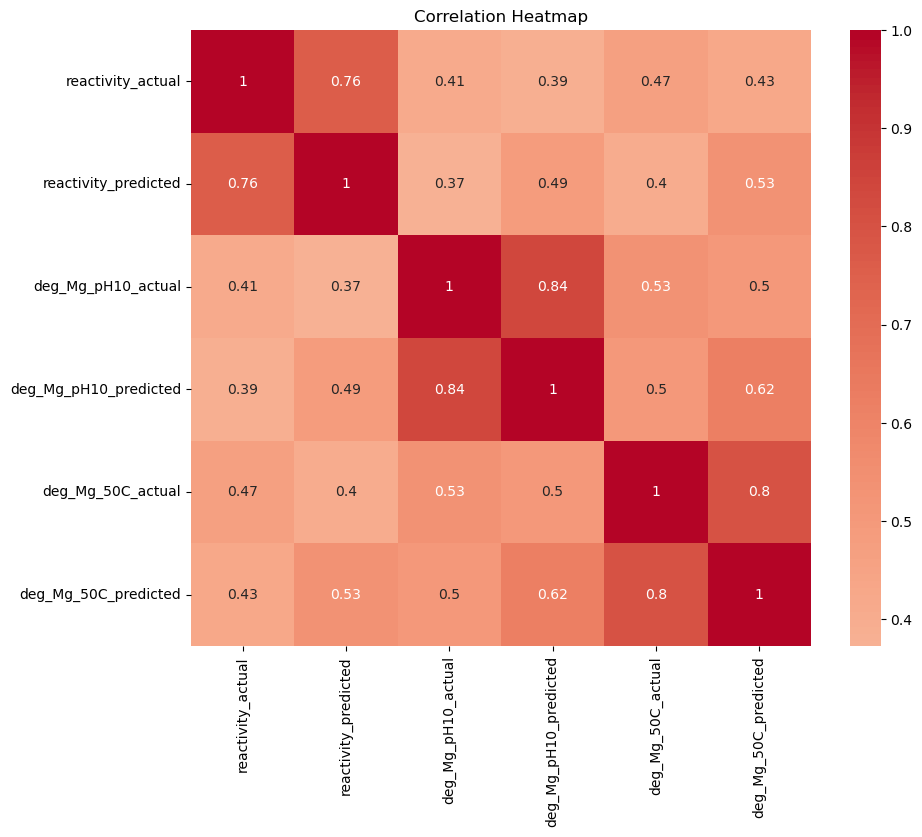

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = error_analysis[['reactivity_actual', 'reactivity_predicted', 'deg_Mg_pH10_actual', 'deg_Mg_pH10_predicted', 'deg_Mg_50C_actual', 'deg_Mg_50C_predicted']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


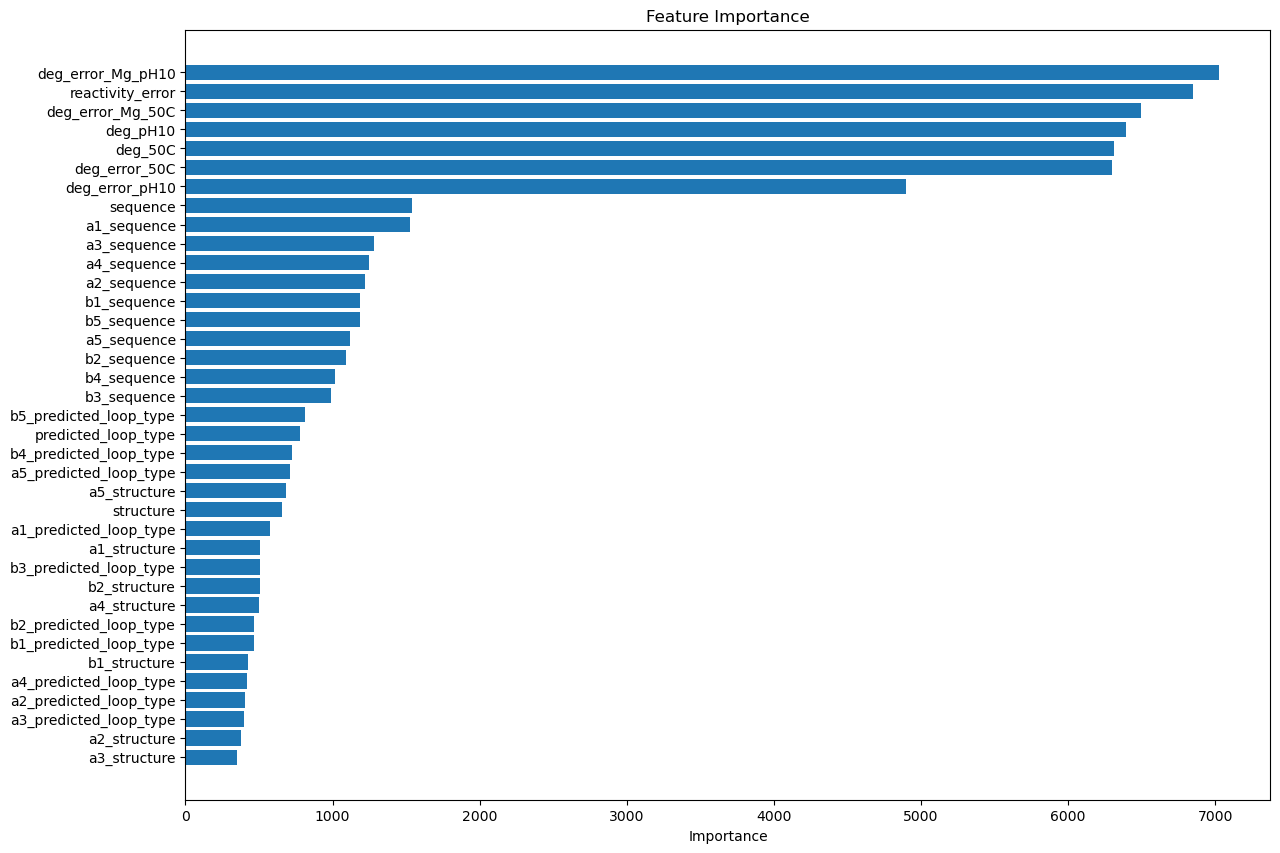

In [24]:
# Get feature importances
importance_dict = xgb_model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Separate feature names and importance scores
features = [x[0] for x in sorted_importance]
importances = [x[1] for x in sorted_importance]

# Create a barplot
plt.figure(figsize=(14, 10))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), features)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


Notice the biggest differences between the actual and the predicted in error analysis df, one pattern we can observe is the existence of number (-1) in b’s_structure, that could indicates that the idea of the beginning and the ending of the sequence was not delivered well to the model.
Surprisingly, as we see : for some reason; b’s_structure have the least importance of the model prediction. Maybe we need to drop some of them. We will see.


Two approaches we have done to reduce the error are : 
1- extracting the last 2 numbers of id_seqpos, (represents the position of the sequence).
2- dropping b5_structure, b4_structure and b3_structure as they are the less importance


In [25]:
trainData['id_seqpos'] = trainData['id_seqpos'].str.extract(r'_(\d+)$')
trainData['id_seqpos']
testData['id_seqpos'] = testData['id_seqpos'].str.extract(r'_(\d+)$')
trainData['id_seqpos']


0         44
1         38
2         34
3         12
4         28
          ..
130555    27
130556    39
130557    52
130558    45
130559    51
Name: id_seqpos, Length: 130560, dtype: object

In [26]:
testData['id_seqpos'] = testData['id_seqpos'].astype(int)
trainData['id_seqpos'] = trainData['id_seqpos'].astype(int)

In [27]:
X = train_encod.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C','b5_structure','b4_structure','b3_structure'], axis=1)
y = train_encod[['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']]

In [28]:
from sklearn.model_selection import train_test_split , KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
     

from xgboost import XGBRegressor
xgb_model = XGBRegressor(max_depth=6,learning_rate=0.1,colsample_bytree=0.9,reg_alpha=5,reg_lambda=6
                      ,min_child_weight = 2,n_estimators=500)


xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [29]:
def calculate_mcrmse(y_true, y_pred):
    # Calculate the squared errors for each feature (column)
    squared_errors = np.square(y_true - y_pred)
    
    # Calculate the mean squared error for each feature
    mse_per_feature = np.mean(squared_errors, axis=0)
    
    # Calculate the root mean squared error for each feature
    rmse_per_feature = np.sqrt(mse_per_feature)
    
    # Calculate the mean of RMSE values across features
    mcrmse = np.mean(rmse_per_feature)
    
    return mcrmse


mcrmse = calculate_mcrmse(y_test, y_pred_xgb)
print("mCRMSE:", mcrmse)

mCRMSE: 0.4522254500282908


mRNA vaccines, the fastest COVID-19 candidates, face degradation issues. Our study predicted degradation-prone segment
s using sequence models.
We used hand and label encoding methods and found the first one performed better,
achieving a 0.382 score via MCRMSE on Leaderboard. Error analysis needs more time
and work to find more hidden patterns and solve the deg_Mg_pH10 correlation problem.
Our future recommendation involves a hybrid model with CNNs and sequence models, 
potentially improved by integrating graph convolutional networks (GCNs) for deeper evaluation of mRNA degradation.